*Storytelling*

**Una Mirada a la Pérdida de Clientes de Telecomunicaciones**

Por: Luis Fernando Sandoval Ramos

Aqui se pretende buscar en los datos, las posibles causas por las cuales los clientes deciden retirarse del servicio. Luego de identificar esas causas, crear promociones y mejoras para retener a la mayor cantidad posible de clientes

**Contenido**

Cada fila representa a un cliente, cada columna contiene los atributos del cliente.

**El conjunto de datos incluye información sobre:**


1.   Clientes que se fueron en el último mes: la columna se llama Abandono

2.   Servicios a los que se ha suscrito cada cliente: teléfono, varias líneas, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas

3.   Información de la cuenta del cliente: cuánto tiempo lleva como cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales

4.   Información demográfica sobre los clientes: sexo, rango de edad y si tienen parejas y dependientes



**CONTENIDO**
1. Revisión de los Datos

 1.1 Busqueda de datos faltantes

 1.2 Decisiones sobre los faltantes

 1.3 Transformación de algunos datos

2.   Visualización de los Datos

 2.1 Revisión por Género y por pérdida de clientes

 2.2 Distribución de Clientes por tipo de contrato

 2.3 Distribución de clientes por métodos de pago

 2.4 Abandonos por género y tipo de Servicio



In [47]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import plotly.express as px
import statsmodels.formula.api as sm
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [48]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive/Data_Science/ENTREGA3")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Data_Science/ENTREGA3


In [62]:
Data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [63]:
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**1 Revisión de los Datos**

1.1 Busqueda de Datos faltantes

<Axes: >

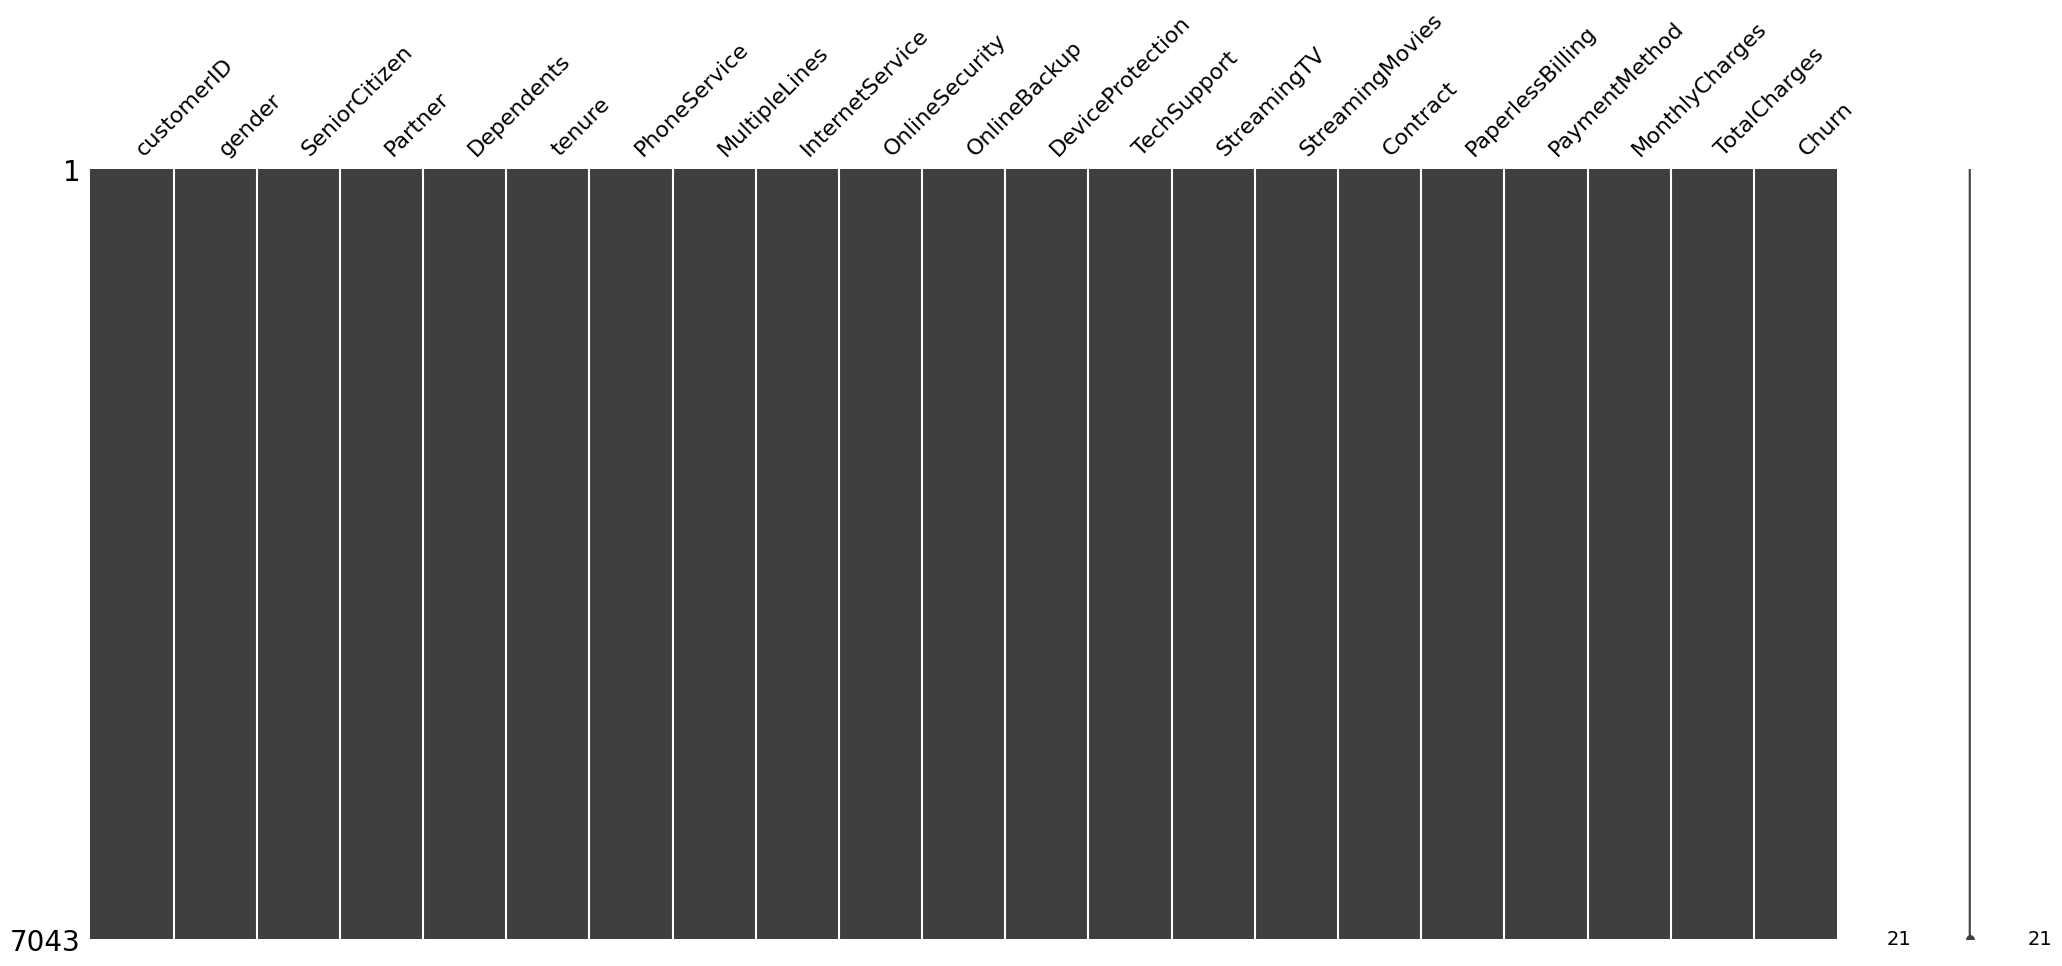

In [53]:
#Podemos visualizar valores faltantes
msno.matrix(Data)

Aparentemente, el dataset no presenta datos faltantes. Pero para poder asegurar lo anterior, debemos ser más exhaustivos en la busqueda de faltantes

In [64]:
Data['TotalCharges'] = pd.to_numeric(Data.TotalCharges, errors='coerce')
Data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Nótese que en la columna "TotalCharges" se encuentran 11 valores nulos (NaN). Revisemos a los abonados con esos nulos

In [65]:
Data[np.isnan(Data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Se puede observar que la columna "tenure" (tenencia) es 0 para estas entradas aunque la columna MonthlyCharges no esté vacía. Veamos si hay otros valores 0 en la columna de "Tenure".

In [66]:
Data[Data['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

1.2 Decisiones sobre los faltantes

Pudimos demostrar que no faltan más valores en la columna "tenure"; por lo tanto, podemos eliminar esas 11 filas que no son representativas en el conjunto de datos. (Nótese que los índices corresponden a los mismos abonados) ya que se buscaron otros ceros en la columna "tenure" y coinciden con los datos faltantes en "TotalCharges"

In [67]:
Data.drop(labels=Data[Data['tenure'] == 0].index, axis=0, inplace=True)

In [68]:
Data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
Data[Data['TotalCharges'] == ''].index

Int64Index([], dtype='int64')

Para resolver el problema de los valores faltantes en la columna "TotalCharges", decidí completarla con la media de los valores de esa columna.

In [70]:
Data.fillna(Data["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


1.3 Transformación de algunos datos

Vamos a proceder a transformar algunos datos del dataset, para facilitar la comprensión de los mismos

In [71]:
Data["SeniorCitizen"]= Data["SeniorCitizen"].map({0: "No", 1: "Yes"})
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 Aquí se procedió a transformar los valores de la columna "SeniorCitizen" que originalmente contienía valores numéricos, donde 0 representa "No" y 1 representa "Yes". La instrucción realiza una transformación de estos valores numéricos en valores de cadena (strings) "No" y "Yes" usando un mapeo

In [ ]:
Data["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

La función "describe()" la utilizamos para extraer datos relevantes de la columna "InternetService"; al agregar el parámetro "include" para que la función "describe()" incluya estadisticas descriptivas

In [ ]:
Data["InternetService"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
Data[["InternetService", "Contract"]].value_counts()

InternetService  Contract      
Fiber optic      Month-to-month    2128
DSL              Month-to-month    1223
No               Two year           633
DSL              Two year           623
                 One year           570
Fiber optic      One year           539
No               Month-to-month     524
Fiber optic      Two year           429
No               One year           363
dtype: int64

Nótese que los usuarios prefieren tener un contrato "Month-to-month" tanto para Fibra óptica y DSL

In [ ]:
columnas_numericas = ['tenure', 'MonthlyCharges',	'TotalCharges']
Data[columnas_numericas].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000



2.   Visualización de los Datos

2.1 Revisión por Género y por pérdida de clientes



In [ ]:
etiqueta_genero = ['Male', 'Female']
etiqueta_churn = ['No', 'Yes']

# Crear subplots: use el tipo 'domain' para la subplot Pie
figura1 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
figura1.add_trace(go.Pie(labels=etiqueta_genero, values=Data['gender'].value_counts(), name="Gender"),
              1, 1)
figura1.add_trace(go.Pie(labels=etiqueta_churn, values=Data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Utilice 'hole' para crear un gráfico circular tipo donut

figura1.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

figura1.update_layout(
    title_text="Género y Distribución de abandonos",
    # Agregar anotaciones en el centro de la donut.
    annotations=[dict(text='Género', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Abandonos', x=0.82, y=0.5, font_size=20, showarrow=False)])
figura1.show()



*   El 26.6 % de los clientes se cambian a otro servicio
*   Entre los clientes el 49.5 % son Mujeres y el 50.5 % son Hombres

A continuación, queremos ver de esos porcentajes de abandono cuantos son Hombres y cuantos Mujeres



In [ ]:
Data["Churn"][Data["Churn"]=="No"].groupby(by=Data["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
Data["Churn"][Data["Churn"]=="Yes"].groupby(by=Data["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

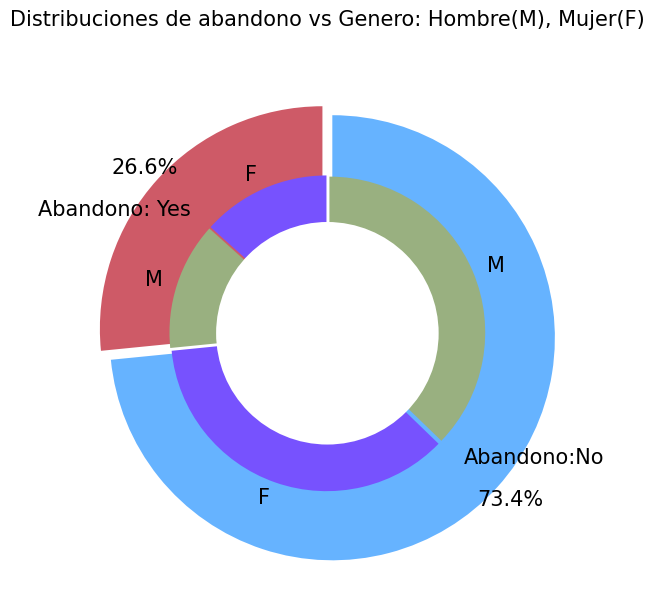

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Abandono: Yes","Abandono:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ce5a67', '#66b3ff']
colors_gender = ['#7752fe','#99b080', '#7752fe','#99b080']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribuciones de abandono vs Genero: Hombre(M), Mujer(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

Existe una diferencia insignificante en el porcentaje/recuento de clientes que cambiaron de proveedor de servicios por género. Ambos géneros se comportaron de manera similar cuando se trata de migrar a otro proveedor de servicios.

2.2 Distribución de Clientes por tipo de Contrato

In [ ]:
fig = px.histogram(Data, x="Churn", color="Contract", barmode="group", title="<b>Distribución de clientes por tipo de contrato<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Alrededor del 75 % de los clientes con contrato de mes a mes optaron por abandonar el servicio en comparación con el 13% de los clientes con contrato de un año y el 3% con contrato de dos años.

2.3 Distribución de clientes por métodos de pago

In [ ]:
labels = Data['PaymentMethod'].unique()
values = Data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Distribución de Métodos de Pago</b>")
fig.show()

In [ ]:
fig = px.histogram(Data, x="Churn", color="PaymentMethod", title="<b>Distribución del Método de pago del Cliente vs Abandono</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*  Los principales clientes que se mudaron tenían cheque electrónico como método de pago.
*   Los clientes que optaron por la transferencia automática con tarjeta de crédito o la transferencia automática bancaria y el cheque enviado por correo como método de pago tenían menos probabilidades de mudarse.




2.4 Abandonos por género y tipo de Servicio

In [ ]:
Data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
Data[Data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [ ]:
Data[Data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Distribuciòn de Abandonos vs Servicio de Internet y Género</b>")

fig.show()




*   Una gran cantidad de clientes eligen el servicio de Fibra óptica y también es evidente que los clientes que utilizan Fibra óptica tienen una alta tasa de abandono, esto podría sugerir una insatisfacción con este tipo de servicio de Internet.

*   Los clientes que tienen servicio DSL son mayoritarios y tienen una menor tasa de abandono en comparación con el servicio de fibra óptica.





2.5 Abandono del servicio por distribución social del cliente

In [ ]:
Data = Data.rename(columns={'Dependents': 'Dependientes', 'Churn': 'Abandono'})
color_map = {"Yes": "#C5E898", "No": "#0766AD"}
fig = px.histogram(Data, x="Abandono", color="Dependientes", barmode="group", title="<b>Distribución por dependientes</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Los clientes sin dependientes, tienen más probabilidades de abandonar el servicio

In [ ]:
color_map = {"Yes": '#2B3499', "No": '#00CC96'}
fig = px.histogram(Data, x="Abandono", color="Partner", barmode="group", title="<b>Distribución de abandono VS Socios</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Los clientes que no tienen socios tienen más probabilidades de abandonar el servicio. Existe una relación de dependencia entre la condición de organización del cliente (si tiene o no un dependiente o socio) y la probabilidad de abandonar o no el servicio adquirido

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(Data, x="Abandono", color="SeniorCitizen", title="<b>Distribución de abandono VS Personas Mayores</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Nótese que la cantidad de personas mayores es un porcentaje bajo, pero de ese porcentaje la mayoría de clientes mayores abandona el servicio

2.6 Abandono por condiciones del servicio y tipo de método de pago

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(Data, x="Abandono", color="OnlineSecurity", barmode="group", title="<b>Abandono VS Seguridad Online</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

La mayoria de los clientes abandonan el servicio debido a la falta de seguridad en linea

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#186F65'}
fig = px.histogram(Data, x="Abandono", color="PaperlessBilling",  title="<b>Distribución de abandono VS Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Los clientes con facturación electrónica tienen más probabilidades de abandonar el servicio

In [ ]:
fig = px.histogram(Data, x="Abandono", color="TechSupport",barmode="group",  title="<b>Distribución de abandono VS Soporte técnico</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Los clientes sin soporte técnico tienen más probabilidades de migrar a otros proveedores de servicio

In [ ]:
color_map = {"Yes": '#419197', "No": '#78D6C6'}
fig = px.histogram(Data, x="Abandono", color="PhoneService", title="<b>Distribución de abandono VS Servicio Telefónico</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Solamente una fracción pequeña de clientes no tiene servicio telefónico, y de esos 1/3 aproximadamente, tiene mas posibilidad de abandonar el servicio

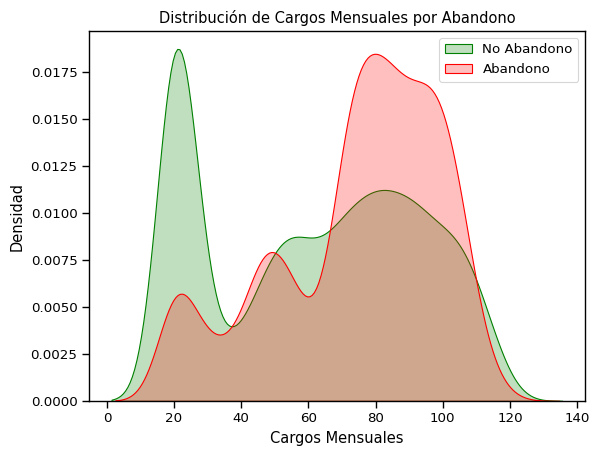

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Abandono"] == 'No') ],
                color="Green", fill = True);
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Abandono"] == 'Yes') ],
                ax =ax, color="Red", fill= True);
ax.legend(["No Abandono","Abandono"],loc='upper right');
ax.set_ylabel('Densidad');
ax.set_xlabel('Cargos Mensuales');
ax.set_title('Distribución de Cargos Mensuales por Abandono');

Los clientes con cargos mensuales más altos también tienen más probabilidades de abandonar

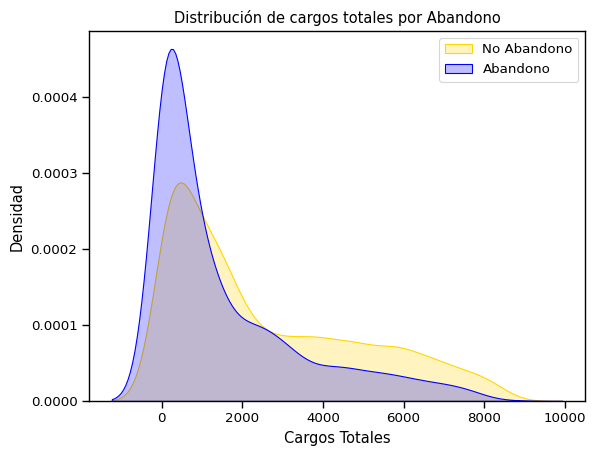

In [ ]:
ax = sns.kdeplot(Data.TotalCharges[(Data["Abandono"] == 'No') ],
                color="Gold", fill = True);
ax = sns.kdeplot(Data.TotalCharges[(Data["Abandono"] == 'Yes') ],
                ax =ax, color="Blue", fill= True);
ax.legend(["No Abandono","Abandono"],loc='upper right');
ax.set_ylabel('Densidad');
ax.set_xlabel('Cargos Totales');
ax.set_title('Distribución de cargos totales por Abandono');

In [ ]:
fig = px.box(Data, x='Abandono', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenencia (Meses)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Abandono', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenencia vs Abandono</b>',
)

fig.show()

Es más probable que los nuevos clientes abandonen el servicio. Luego del més 30 hay una alta probabilidad de que el cliente no abandone el servicio

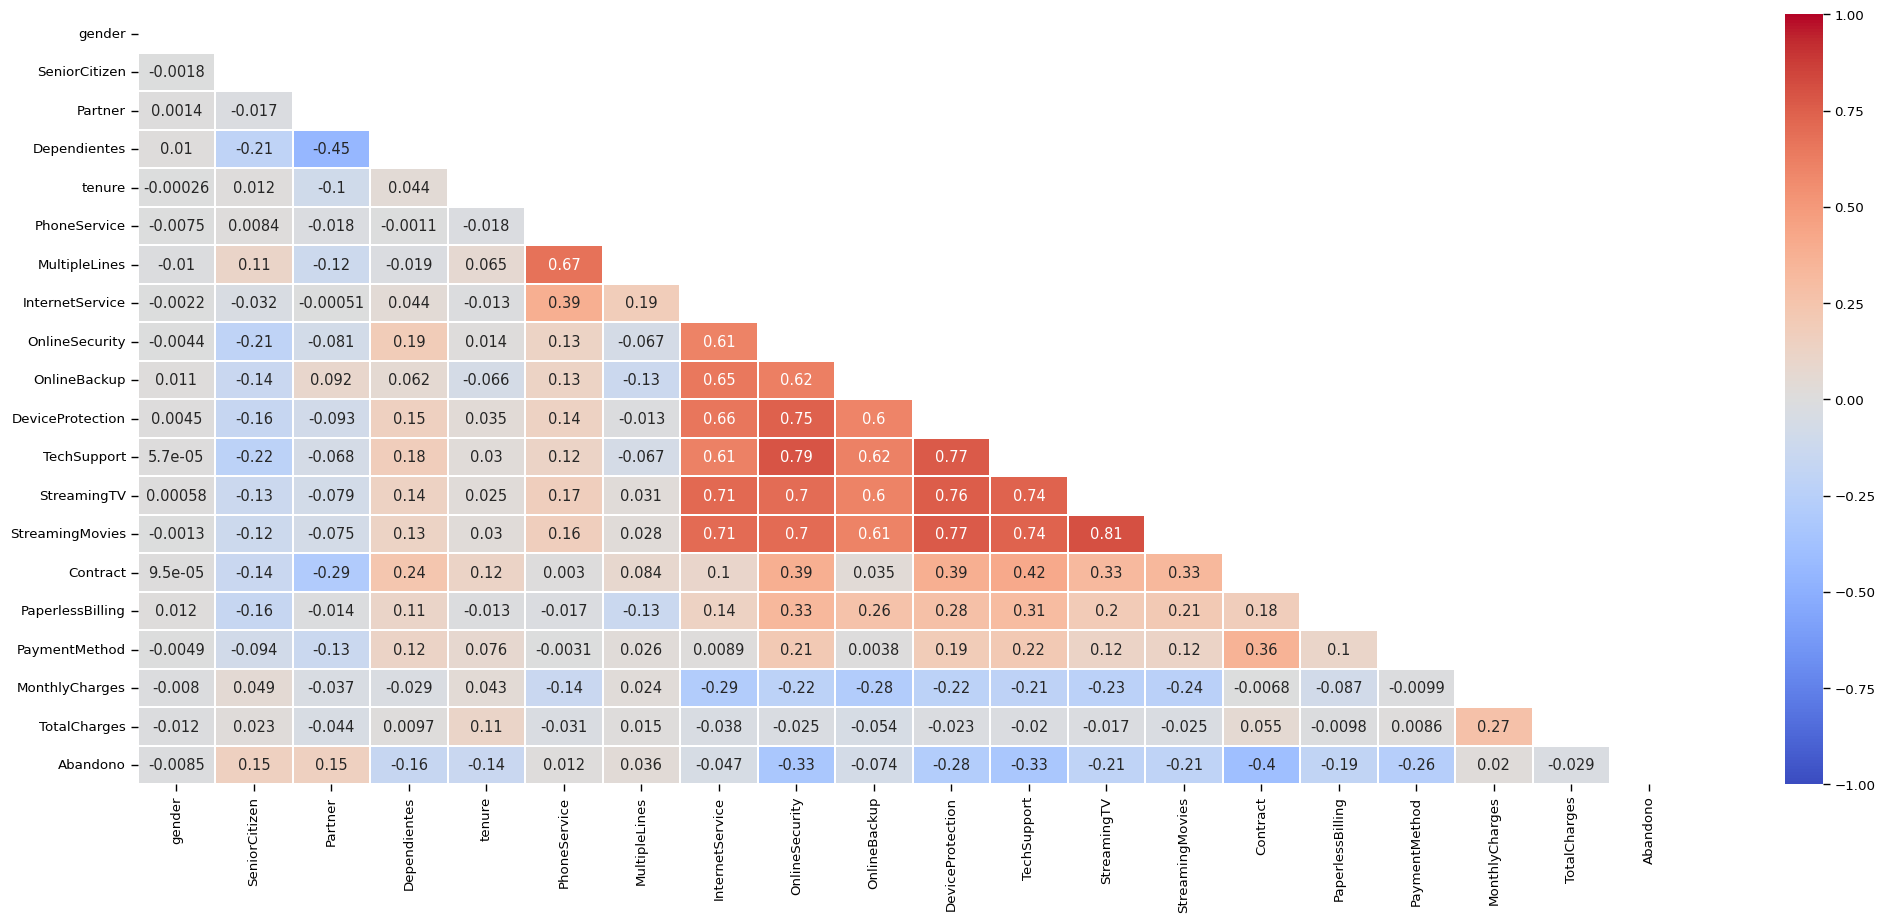

In [ ]:
plt.figure(figsize=(25, 10))

corr = Data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

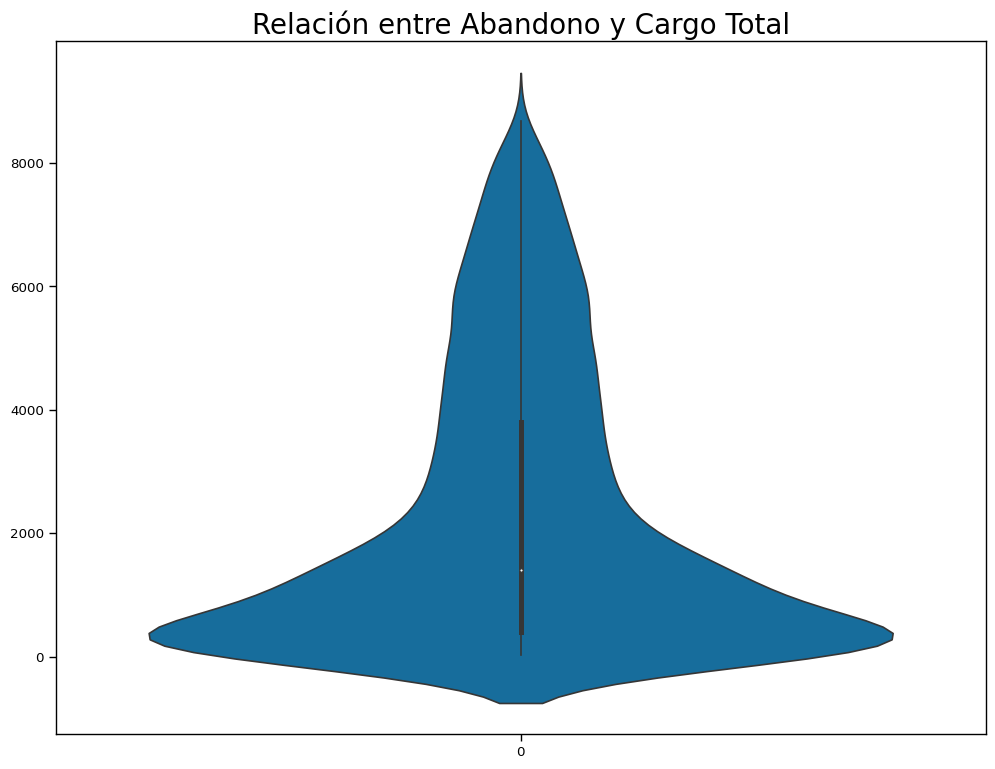

In [ ]:
# TotalCharges vs Abandono
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(Data['TotalCharges'], palette = 'colorblind')
plt.title('Relación entre Abandono y Cargo Total', fontsize = 20, fontweight = 30)
plt.show()

El gráfico bivariado muestra que la mayor cantidad de abandono del servicio está en los usuarios que han realizado menos pagos totales, los clientes que pagan más de 3000 suelen tener menores tasas de abandono del servicio

**FUENTE DE DATOS**

En la variable "url2" tenemos la fuente de datos de un Dataset mas completo relacionado con la pérdida de clientes. Hasta el momento, hemos venido analizando los datos encontrados en el dataset "Data"; en la fuente "url2" encontramos 3 datasets comprimidos en zip, para extraer los datos que nos interesan, utilizamos el segmento de código a continuación y lo almacenamos en la variable "Datos2".

In [ ]:
from io import BytesIO
from zipfile import ZipFile
import requests

url2 = 'https://maven-datasets.s3.amazonaws.com/Telecom+Customer+Churn/Telecom+Customer+Churn.zip'

target_file = 'telecom_customer_churn.csv' #Este código extrae de un archivo comprimido en la url, el archivo csv de interés.

response = requests.get(url2)

if response.status_code == 200:
  with ZipFile(BytesIO(response.content)) as zip_file:
    if target_file in zip_file.namelist():
      Data2 = pd.read_csv(zip_file.open(target_file))

      print(Data2)
    else:
        print(f"El archivo {target_file} no se encuentra en el ZIP.")

else:
        print(f"Error al descargar el archivo. Código de estado: {response.status_code}")



In [72]:
Data2.head()

,Customer ID,Age,City,Latitude,Longitude
0,0002-ORFBO,37,Frazier Park,34.827662,-118.999073
1,0003-MKNFE,46,Glendale,34.162515,-118.203869
2,0004-TLHLJ,50,Costa Mesa,33.645672,-117.922613
3,0011-IGKFF,78,Martinez,38.014457,-122.115432
4,0013-EXCHZ,75,Camarillo,34.227846,-119.079903


In [73]:
Data2=Data2[['Customer ID', 'Age', 'City', 'Latitude', 'Longitude']]

In [74]:
Data2.head()

,Customer ID,Age,City,Latitude,Longitude
0,0002-ORFBO,37,Frazier Park,34.827662,-118.999073
1,0003-MKNFE,46,Glendale,34.162515,-118.203869
2,0004-TLHLJ,50,Costa Mesa,33.645672,-117.922613
3,0011-IGKFF,78,Martinez,38.014457,-122.115432
4,0013-EXCHZ,75,Camarillo,34.227846,-119.079903


In [76]:
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Revisamos el dataset "Data" y notamos que la variable "Customer ID" está escrito de forma diferente en en "Data2", para utilizar esa columna como primary key, debemos renombrar la columna.

In [79]:
Data.rename(columns={'customerID': 'Customer ID'}, inplace=True)

In [80]:
Data.head()


,Customer ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
Data3 = pd.merge(Data, Data2, on="Customer ID")

In [82]:
Data3.head()

,Customer ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age,City,Latitude,Longitude
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,36,Los Angeles,33.973616,-118.249020
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,46,Los Angeles,33.949255,-118.246978
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,37,Los Angeles,33.964131,-118.272783
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,53,Los Angeles,34.076259,-118.310715
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,19,Los Angeles,34.059281,-118.307420


A Data, vamos a agregar las columnas 'Customer ID', 'Age', 'City', 'Latitude', 'Longitude', esto con el fin de establecer la pérdida de clientes respecto a la ubicación geográfica. En el dataset Data no contabamos con esta información